In [126]:
# Wczytanie danych
import pandas as pd
import numpy as np
from scipy import stats

df1 = pd.read_csv("df1.csv")
df2 = pd.read_csv("df2.csv")

# Połączenie obu ram danych
combined_df = pd.merge(df1, df2, on='EmployeeNumber', how='inner')


combined_df = combined_df[np.abs(stats.zscore(combined_df['YearsWithCurrManager'], nan_policy='omit')) < 3]
combined_df = combined_df[np.abs(stats.zscore(combined_df['DistanceFromHome'], nan_policy='omit')) < 3]
combined_df = combined_df[np.abs(stats.zscore(combined_df['YearsSinceLastPromotion'], nan_policy='omit')) < 3]
combined_df = combined_df[np.abs(stats.zscore(combined_df['TrainingTimesLastYear'], nan_policy='omit')) < 3]
combined_df = combined_df[np.abs(stats.zscore(combined_df['YearsInCurrentRole'], nan_policy='omit')) < 3]

#wywalenie Attrition tam gdzie sa NaN
combined_df.dropna(subset=["Attrition"], inplace=True)
assert combined_df["Attrition"].isna().sum()==0, "Kolumna Attrition nie jest poprawnie wypelniona"

# Wyświetlenie kilku pierwszych wierszy ramki danych
combined_df.head()



,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [97]:
# Instalacja pakietu pandas-profiling (jeśli jeszcze nie jest zainstalowany)
!pip install -U ydata-profiling[notebook]==4.0.0 matplotlib==3.5.1



In [98]:
# Importowanie biblioteki niezbędnej do raportu
from pandas_profiling import ProfileReport

# Generowanie raportu
profile = ProfileReport(combined_df, title="Report", explorative=True)

# Zapisanie raportu do pliku HTML
profile.to_file("Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [127]:
# Lista kolumn zawierających informacje o latach
columns_to_convert = ['DistanceFromHome', 'JobSatisfaction', 'MonthlyIncome',
                      'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                      'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Konwersja kolumn na format liczbowy
combined_df[columns_to_convert] = combined_df[columns_to_convert].astype(float)

# Sprawdzenie typów danych w kolumnach, aby potwierdzić dokonaną konwersję
print(combined_df.dtypes)

EmployeeNumber                int64
Age                         float64
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EmployeeCount               float64
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           

In [128]:
# Definiowanie mapowania wartości tekstowych na liczby całkowite dla każdej kolumny
business_travel_mapping = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
department_mapping = {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
education_field_mapping = {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
gender_mapping = {'Female': 0, 'Male': 1}
job_role_mapping = {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
marital_status_mapping = {'Divorced': 0, 'Married': 1, 'Single': 2}
over18_mapping = {'Y': 1}
over_time_mapping = {'No': 0, 'Yes': 1}
attrition_mapping = {'No': 0, 'Yes': 1}

# Mapowanie wartości dla odpowiednich kolumn
combined_df['BusinessTravel'] = combined_df['BusinessTravel'].map(business_travel_mapping)
combined_df['Department'] = combined_df['Department'].map(department_mapping)
combined_df['EducationField'] = combined_df['EducationField'].map(education_field_mapping)
combined_df['Gender'] = combined_df['Gender'].map(gender_mapping)
combined_df['JobRole'] = combined_df['JobRole'].map(job_role_mapping)
combined_df['MaritalStatus'] = combined_df['MaritalStatus'].map(marital_status_mapping)
combined_df['Over18'] = combined_df['Over18'].map(over18_mapping)
combined_df['OverTime'] = combined_df['OverTime'].map(over_time_mapping)
combined_df['Attrition'] = combined_df['Attrition'].map(over_time_mapping)

In [129]:
combined_df['Attrition'].unique()

array([0, 1])

In [130]:
# Sprawdzenie typów danych w kolumnach, aby zweryfikować konwersję
print(combined_df.dtypes)

EmployeeNumber                int64
Age                         float64
BusinessTravel                int64
DailyRate                   float64
Department                    int64
DistanceFromHome            float64
Education                   float64
EducationField                int64
EmployeeCount               float64
EnvironmentSatisfaction     float64
Gender                        int64
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                       int64
JobSatisfaction             float64
MaritalStatus                 int64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                        int64
OverTime                      int64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           

In [131]:

columns_to_convert = ['Attrition']

# Konwersja kolumn na format liczbowy
combined_df[columns_to_convert] = combined_df[columns_to_convert].astype(float)

# Sprawdzenie typów danych w kolumnach, aby potwierdzić dokonaną konwersję
print(combined_df.dtypes)

EmployeeNumber                int64
Age                         float64
BusinessTravel                int64
DailyRate                   float64
Department                    int64
DistanceFromHome            float64
Education                   float64
EducationField                int64
EmployeeCount               float64
EnvironmentSatisfaction     float64
Gender                        int64
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                       int64
JobSatisfaction             float64
MaritalStatus                 int64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                        int64
OverTime                      int64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           

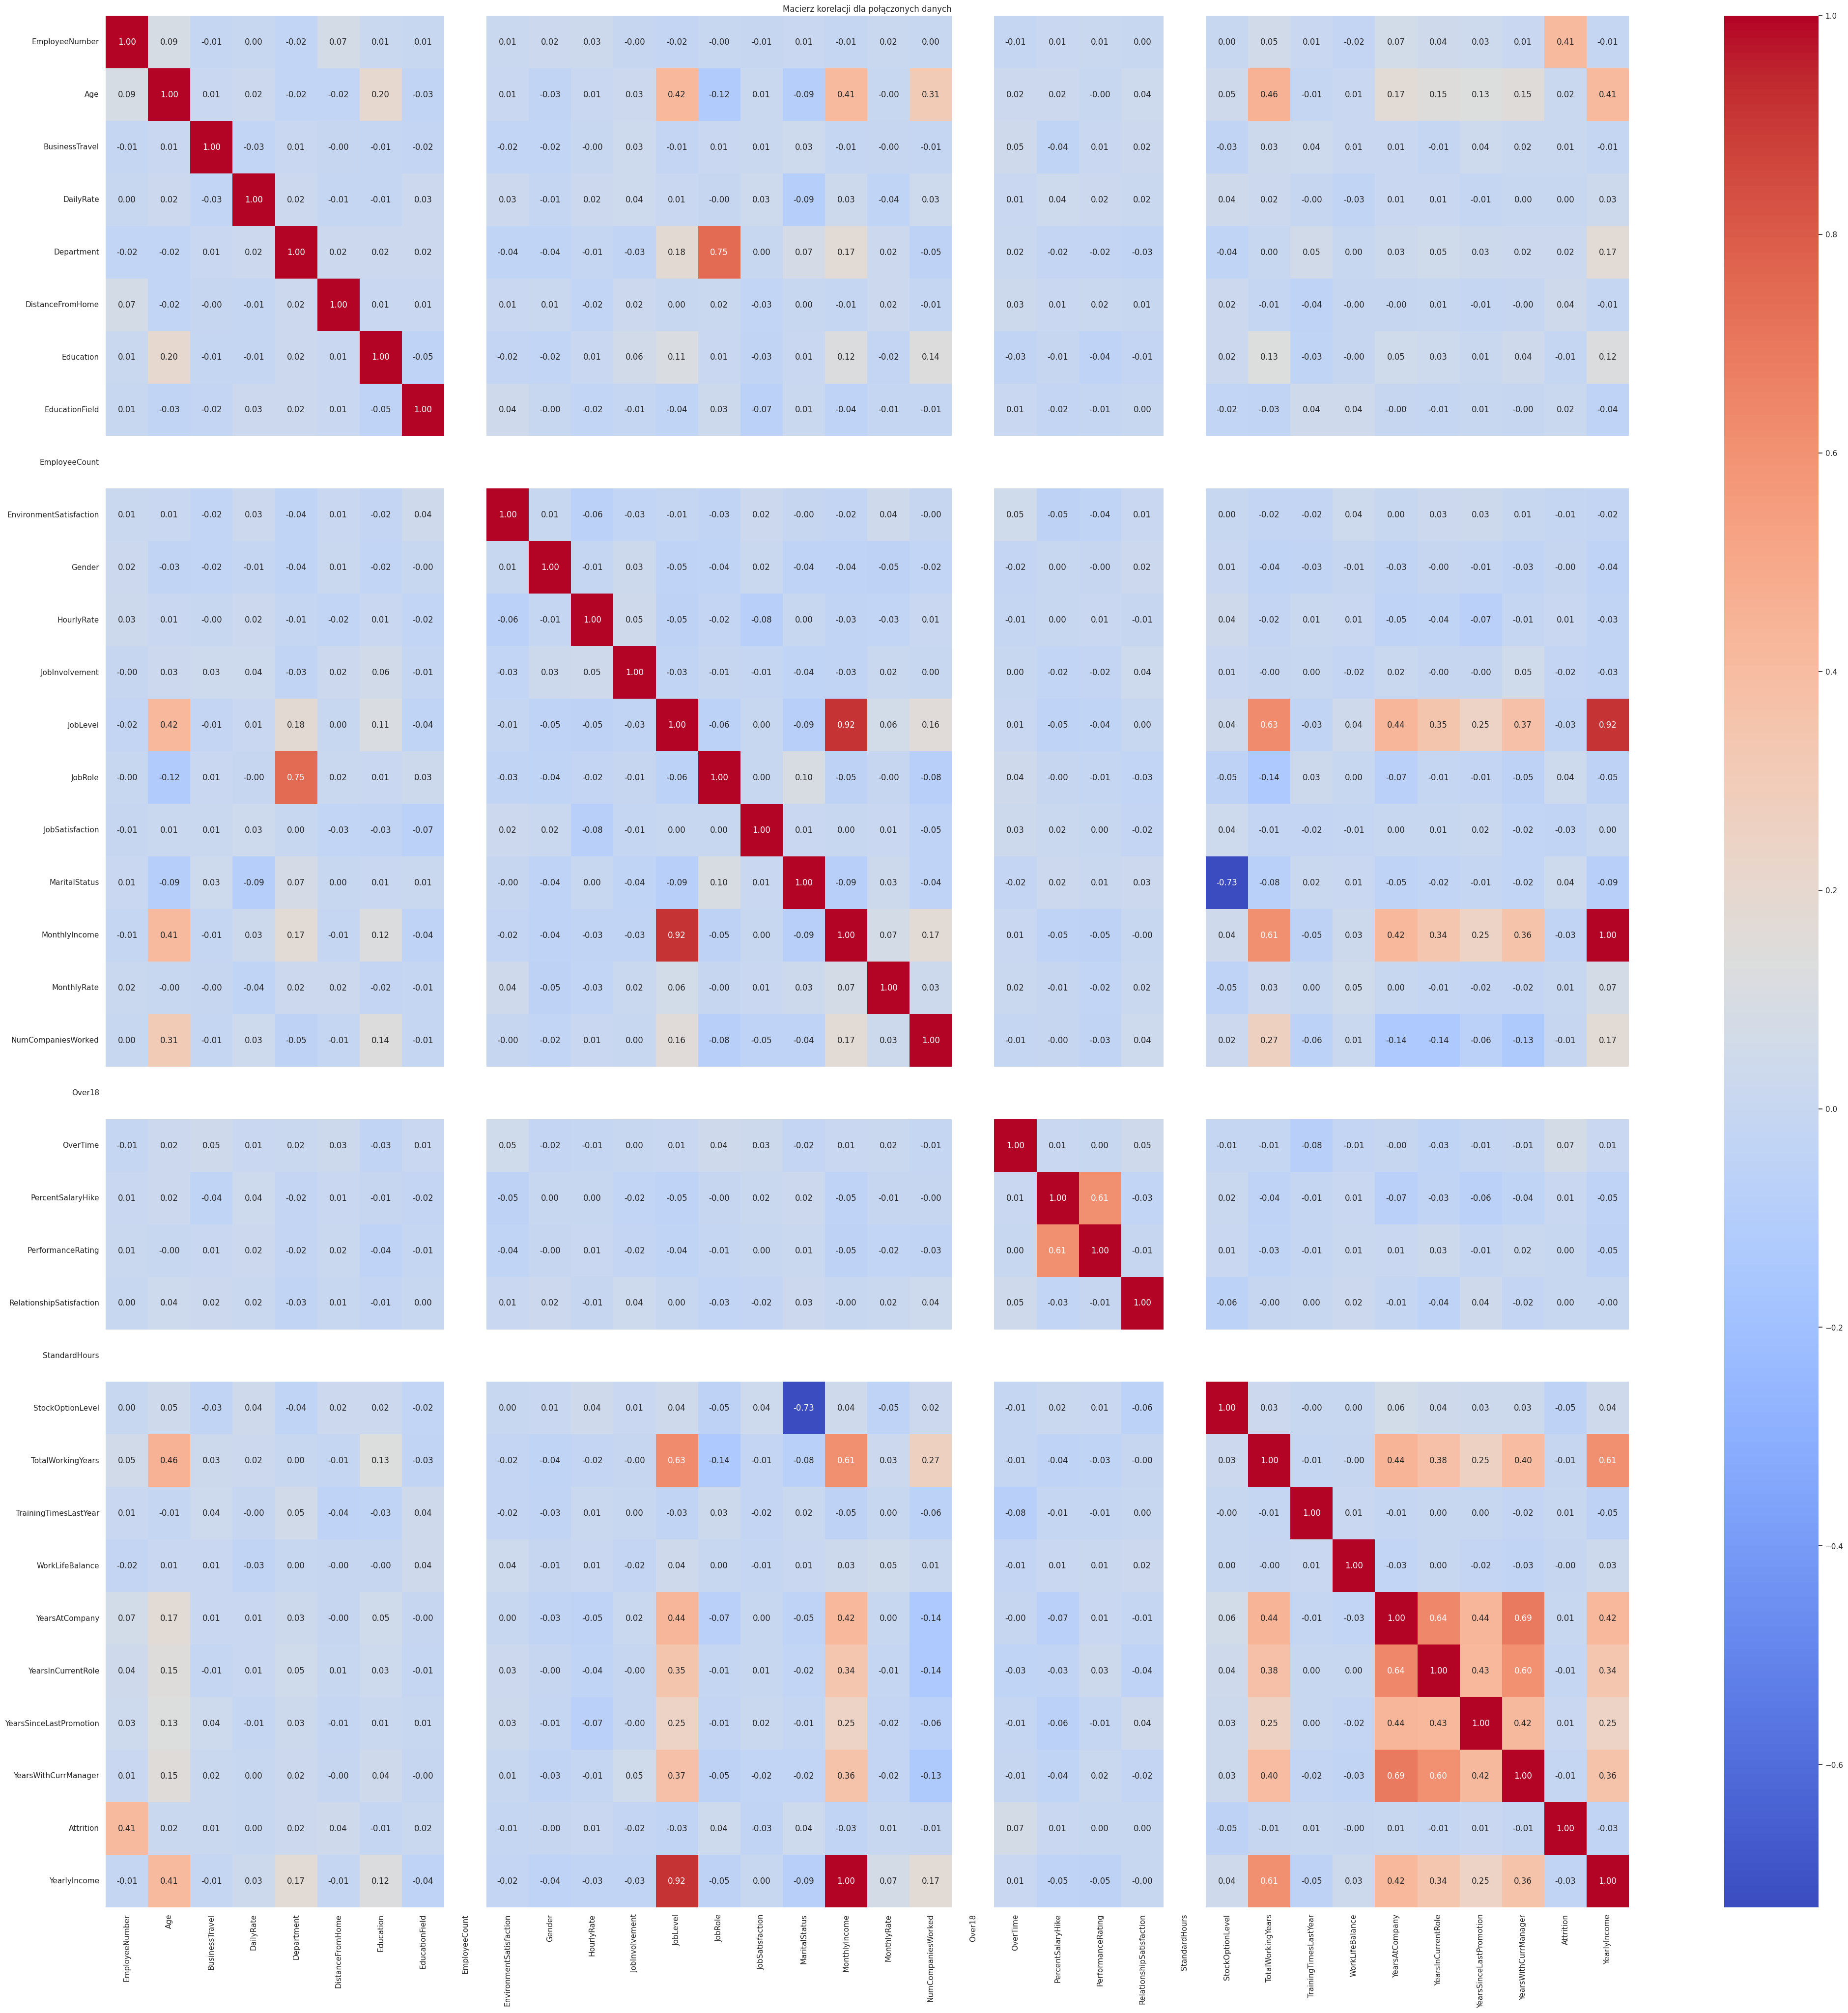

In [132]:
#Macierz korelacji
import matplotlib.pyplot as plt
import seaborn as sns
# Tworzenie macierzy korelacji
correlation_matrix = combined_df.corr(method='spearman')
# Tworzenie wykresu
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
# Tytuł wykresu
plt.title("Macierz korelacji dla połączonych danych")
#Wyświetlanie wykresu
plt.show()

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
# Wybierz kolumny do analizy korelacji (bez EmployeeNumber)
columns_to_analyze = combined_df.columns.difference(['EmployeeNumber'])

# Tworzenie macierzy korelacji bez EmployeeNumber
correlation_matrix = combined_df[columns_to_analyze].corr(method='spearman')

# Wybierz korelacje z atrycją (bez EmployeeNumber)
atrycja_corr = correlation_matrix['Attrition'].sort_values(ascending=False)

# Wybierz top 5 zmiennych o najwyższej korelacji z atrycją
top_5_corr = atrycja_corr[1:6]  # Pomijamy samą korelację z atrycją

print(top_5_corr)

OverTime            0.070276
DistanceFromHome    0.041687
MaritalStatus       0.038713
JobRole             0.036472
Department          0.024114
Name: Attrition, dtype: float64


## **Koniec preprocessingu**



Podział na zbiór testowy i treningowy

In [136]:
from sklearn.model_selection import train_test_split

# Podział na zbiór treningowy i testowy dla danych rzeczywistych
X_train, X_test, y_train, y_test = train_test_split(
    combined_df[["DistanceFromHome", "YearsSinceLastPromotion", "TrainingTimesLastYear", "YearsInCurrentRole", "YearsWithCurrManager"]],
    combined_df['Attrition'],  # y to kolumna Attrition
    train_size=0.8,
    random_state=42,
    stratify=combined_df['Attrition']  # zachowuje proporcje klas w zbiorze y
)

# Informacje o kształcie zbiorów treningowych i testowych
print("Zbiór treningowy:", X_train.shape, y_train.shape)
print("Zbiór testowy:", X_test.shape, y_test.shape)



Zbiór treningowy: (2948, 5) (2948,)
Zbiór testowy: (738, 5) (738,)


Model klasyfikacji, predykcja, odena f1 score

In [140]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import f1_score

# Przygotuj różne wersje modelu Bayesowskiego i dyskretyzacji
models = {
    "MultinomialNB": MultinomialNB(),
    "GaussianNB": GaussianNB()
}

# Przetestuj różne wersje dyskretyzacji
k_values = [2, 3, 5]  # Różne wartości parametru k

results = []  # Lista do przechowywania wyników

for k in k_values:
    discretizers = {
        "No Discretization": None,
        "Uniform Discretization": KBinsDiscretizer(n_bins=k, encode='ordinal', strategy='uniform'),
        "Quantile Discretization": KBinsDiscretizer(n_bins=k, encode='ordinal', strategy='quantile')
    }

    # Przejdź przez różne modele i dyskretyzacje
    for model_name, model in models.items():
        for discretizer_name, discretizer in discretizers.items():
            # Stosuj dyskretyzację, jeśli dostępna
            if discretizer:
                X_train_discrete = discretizer.fit_transform(X_train)
                X_test_discrete = discretizer.transform(X_test)
            else:
                X_train_discrete, X_test_discrete = X_train, X_test

            # Trenuj model Bayesowski
            model.fit(X_train_discrete, y_train)

            # Przewiduj etykiety dla zbioru testowego
            y_pred = model.predict(X_test_discrete)

            # Oceń wydajność modelu za pomocą F1 score
            f1 = f1_score(y_test, y_pred)

            # Zapisz wyniki
            results.append({
                "Model": model_name,
                "Dyskretyzacja": discretizer_name,
                "k": k,
                "F1 Score": f1
            })

# Posortuj wyniki według F1 score malejąco
sorted_results = sorted(results, key=lambda x: x["F1 Score"], reverse=True)

# Wybierz najlepsze parametry (pierwszy wynik)
best_params = sorted_results[0]

print("Najlepsze parametry:")
print("Model:", best_params["Model"])
print("Dyskretyzacja:", best_params["Dyskretyzacja"])
print("k:", best_params["k"])
print("F1 Score:", best_params["F1 Score"])


Najlepsze parametry:
Model: GaussianNB
Dyskretyzacja: Quantile Discretization
k: 5
F1 Score: 0.47938931297709925


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279